## Bibliotecas Utilizadas

In [231]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential, load_model
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D, AveragePooling2D
from keras.utils import np_utils
from keras.utils.vis_utils import plot_model
from keras import backend as K
from keras.preprocessing.image import img_to_array, load_img, array_to_img
from datetime import datetime, time



In [124]:
print ("Início Execução : ")
print (datetime.now().strftime("%Y-%m-%d %H:%M:%S"))

Início Execução : 
2021-07-19 11:35:20


# Carregando os dados 

In [125]:
path_treino = './data/frutas/Training' 
path_teste = './data/frutas/Test'

In [228]:
def get_dados(path, numero_frutas):
    lista_dir = os.listdir(path)
    X = []
    Y = []
    fruta_num = 0
    passo = len(lista_dir)/numero_frutas
    for idx, fruta in enumerate(lista_dir):
        if (idx % passo != 0):
            continue
        lista_img = os.listdir(f"{path}/{fruta}")
        print(f"{fruta_num} - {idx} - {fruta}")
        for img in lista_img:
            arquivo = f"{path}/{fruta}/{img}"
            img_fruta = img_to_array(load_img(arquivo, target_size=(32, 32)))
            X.append(img_fruta)
            Y.append(fruta_num)
        fruta_num = fruta_num + 1    
    return (X, Y)

In [127]:
def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training Accuracy')
    plt.plot(x, val_acc, 'r', label='Validation Accuracy')
    plt.title('Training and validation Accuracy')
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

In [369]:
num_frutas = 10

In [370]:
X_frutas, Y_frutas = get_dados(path_treino, num_frutas)

0 - 0 - Apple Braeburn
1 - 12 - Apple Red Yellow 2
2 - 24 - Carambula
3 - 36 - Eggplant
4 - 48 - Hazelnut
5 - 60 - Mango Red
6 - 72 - Orange
7 - 84 - Pear Williams
8 - 96 - Plum 3
9 - 108 - Strawberry


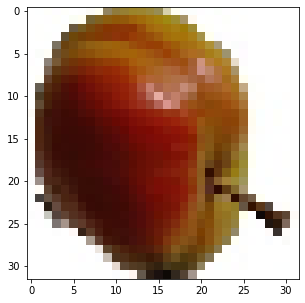

In [371]:
plt.figure(figsize=(5,5))
plt.imshow(array_to_img(X_frutas[990]))

In [376]:
Y_frutas[990]

1

In [351]:
len(X_frutas)

2825

In [352]:
len(Y_frutas)

2825

In [353]:
X_train = np.asarray(X_frutas).astype(np.float32)
Y_train = np.asarray(Y_frutas)

In [354]:
X_train.shape

(2825, 32, 32, 3)

In [355]:
Y_train.shape

(2825,)

In [356]:
X_train = X_train/255

In [357]:
Y_train = to_categorical(Y_train, num_frutas)

In [358]:
Y_train.shape

(2825, 5)

In [368]:
print(num_frutas)

5


In [363]:
# Cria o modelo
model = Sequential()
#Convolução 2D 
model.add(Conv2D(6, (5, 5), input_shape=(32, 32, 3), activation='relu'))
#Camada de Pooling 	    
#model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(AveragePooling2D(pool_size=(2, 2)))
#model.add(Dropout(0.4))
#Convolução 2D
model.add(Conv2D(16, (5, 5), activation='relu'))
#Camada de Pooling 	    
#model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(AveragePooling2D(pool_size=(2, 2)))
#model.add(Dropout(0.4))
#Converte o conjunto de imagens e um vetor unidimensional para a entrada da rede neural totalmente conectada
model.add(Flatten())
model.add(Dense(120, activation='relu'))
#model.add(Dropout(0.4))
model.add(Dense(84, activation='relu'))
#model.add(Dropout(0.4))
model.add(Dense(num_frutas, activation='softmax'))
model.summary()

Model: "sequential_28"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_68 (Conv2D)           (None, 28, 28, 6)         456       
_________________________________________________________________
average_pooling2d_22 (Averag (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_69 (Conv2D)           (None, 10, 10, 16)        2416      
_________________________________________________________________
average_pooling2d_23 (Averag (None, 5, 5, 16)          0         
_________________________________________________________________
flatten_26 (Flatten)         (None, 400)               0         
_________________________________________________________________
dense_78 (Dense)             (None, 120)               48120     
_________________________________________________________________
dense_79 (Dense)             (None, 84)              

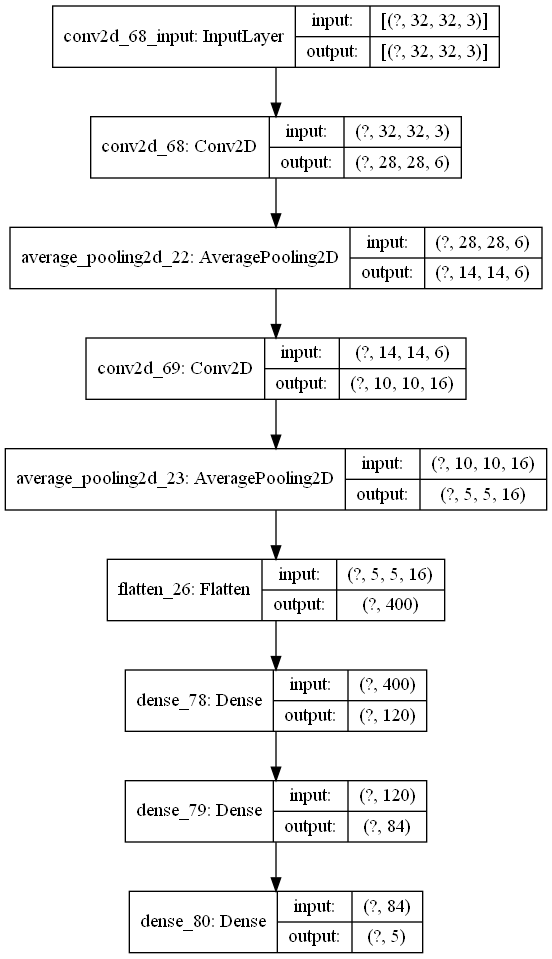

In [364]:
plot_model(model, show_shapes=True, show_layer_names=True)

In [365]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [366]:
history = model.fit(X_train, Y_train, validation_split = 0.2, epochs=50, batch_size=64)

Epoch 1/50
36/36 [==============================] - 0s 9ms/step - loss: 0.6779 - accuracy: 0.7527 - val_loss: 0.0981 - val_accuracy: 1.0000
Epoch 2/50
36/36 [==============================] - 0s 4ms/step - loss: 0.0891 - accuracy: 0.9704 - val_loss: 0.0311 - val_accuracy: 1.0000
Epoch 3/50
36/36 [==============================] - 0s 4ms/step - loss: 0.0137 - accuracy: 0.9991 - val_loss: 0.0192 - val_accuracy: 1.0000
Epoch 4/50
36/36 [==============================] - 0s 4ms/step - loss: 0.0036 - accuracy: 1.0000 - val_loss: 0.0071 - val_accuracy: 1.0000
Epoch 5/50
36/36 [==============================] - 0s 4ms/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 0.0047 - val_accuracy: 1.0000
Epoch 6/50
36/36 [==============================] - 0s 4ms/step - loss: 9.6120e-04 - accuracy: 1.0000 - val_loss: 0.0040 - val_accuracy: 1.0000
Epoch 7/50
36/36 [==============================] - 0s 4ms/step - loss: 6.6596e-04 - accuracy: 1.0000 - val_loss: 0.0031 - val_accuracy: 1.0000
Epoch 8/50
3

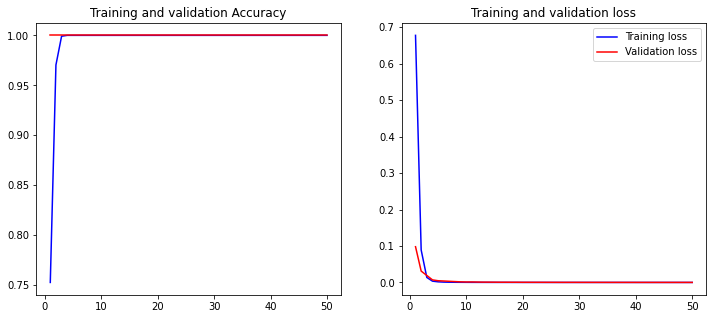

In [367]:
plot_history(history)

In [177]:
scores = model.evaluate(X_train, Y_train, verbose=0)
print("Erro da CNN: %.2f%%" % (100-scores[1]*100))
print("Acurácia da CNN: %.2f%%" % (scores[1]*100))

Erro da CNN: 15.40%
Acurácia da CNN: 84.60%


In [116]:
X_frutas, Y_frutas = get_dados(path_teste, num_frutas)

0 - 0 - Apple Braeburn
1 - 24 - Carambula
2 - 48 - Hazelnut
3 - 72 - Orange
4 - 96 - Plum 3


In [117]:
X_test = np.asarray(X_frutas).astype(np.float32)
Y_test = np.asarray(Y_frutas)

In [118]:
X_test = X_test/255
Y_test = to_categorical(Y_test, num_frutas)

In [119]:
X_test.shape

(951, 28, 28, 3)

In [120]:
Y_test.shape

(951, 5)

In [121]:
scores = model.evaluate(X_test, Y_test, verbose=0)
print("Erro da CNN: %.2f%%" % (100-scores[1]*100))
print("Acurária da CNN: %.2f%%" % (scores[1]*100))

Erro da CNN: 0.21%
Acurária da CNN: 99.79%


In [122]:
print ("Fim Execução : ")
print (datetime.now().strftime("%Y-%m-%d %H:%M:%S"))

Fim Execução : 
2021-07-19 11:25:55
